Nama : Jamilatur Rizqil Yasiri

NIM : G.211.21.0088

Kelas : Teknik Informatika B Pagi

---



**1. BUSSINESS UNDERSTANDING**

Dari dataset Kacang kering, dapat diambil deskripsi business understanding  

1.  Mengembangkan sebuah sistem yang dapat membedakan dan mengklasifikasikan biji kering berdasarkan ciri-ciri tertentu. Hal ini dapat memiliki implikasi penting dalam industri pertanian atau pengolahan biji kering, di mana pemisahan kelas / varietas  biji yang berbeda dapat membantu dalam manajemen pasokan, pemilahan kualitas, atau proses pengolahan yang lebih efisien.

1. Menggunakan sistem komputer vision dengan kamera beresolusi tinggi untuk mengambil foto biji kacang dan membedakan tujuh kelas varietas kacang kering yang memiliki ciri-ciri yang serupa.

2. Mengidentifikasi dan mengklasifikasikan tujuh jenis biji kering berdasarkan ciri-ciri seperti bentuk, tipe, dan struktur

3. Sebanyak 16 fitur diperoleh dari setiap biji kering, termasuk 12 dimensi dan 4 bentuk bentuk.

4. Setelah Mengidentifikasi dan mengklasifikasikan tujuh jenis biji kering, kemudian mengelompokkan Kacang kering masing masing kedalam 7 Kelas yang berbeda yaitu DERMASON, SIRA, SEKER, HOROZ, CALI, BARBUNYA, BOMBAY      

---

**2. DATA UNDERSTANDING**

1. Data tersebut didapatkan dari **UCI Machine Learning** dengan judul **Dry Neatbean Dataset**
1. Data tersebut terdiri dari 13.611 gambar biji kering dari 7 kelas yang berbeda. Setiap gambar mewakili satu butir biji kering .

2. Pada setiap kelas memiliki masing-masing jumlah sebagai berikut:  Kelas DERMASON    3546, Kelas
SIRA        2636, Kelas
SEKER       2027, Kelas
HOROZ       1860, Kelas
CALI        1630, Kelas
BARBUNYA    1322, Kelas
BOMBAY       522 Jika ditotalkan semuanya adalah 13.611 data


4. Terdapat 16 fitur yang diekstraksi dari setiap biji kering, termasuk 12 dimensi dan 4 bentuk bentuk.

Dataset ini akan menjadi dasar untuk mengembangkan model klasifikasi yang dapat membedakan tujuh kelas biji kering berdasarkan fitur-fitur yang diekstraksi. Data ini dapat digunakan untuk melatih dan menguji model klasifikasi yang dikembangkan, serta untuk melakukan analisis lebih lanjut terkait karakteristik biji kering. Klasifikasi ini menggunakan 5 Algoritma
1.   Logistic Regresion
2.   K Nearest Neighbors (KNN)
3. Decision Tree
4. Naive Bayes
5. Support vector machine ( SVM )

---

**3. DATA PREPROCESSING**

In [ ]:
#import library untuk analisis dataa

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Import Data dari File Manager Kita
from google.colab import files
uploaded = files.upload()

Saving Dry_Bean.csv to Dry_Bean (1).csv


In [ ]:
# Load Dataset
data = pd.read_csv("Dry_Bean.csv")


In [ ]:
# Melihat dimensi data
data.shape

(13611, 17)

In [ ]:
# Menampilkan data 10 Teratas
data.head(10)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
5,30279,634.927,212.560556,181.510182,1.171067,0.520401,30600,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236,SEKER
6,30477,670.033,211.050155,184.039050,1.146768,0.489478,30970,196.988633,0.762402,0.984081,0.853080,0.933374,0.006925,0.003242,0.871186,0.999049,SEKER
7,30519,629.727,212.996755,182.737204,1.165591,0.513760,30847,197.124320,0.770682,0.989367,0.967109,0.925480,0.006979,0.003158,0.856514,0.998345,SEKER
8,30685,635.681,213.534145,183.157146,1.165852,0.514081,31044,197.659696,0.771561,0.988436,0.954240,0.925658,0.006959,0.003152,0.856844,0.998953,SEKER
9,30834,631.934,217.227813,180.897469,1.200834,0.553642,31120,198.139012,0.783683,0.990810,0.970278,0.912125,0.007045,0.003008,0.831973,0.999061,SEKER


In [ ]:
data.dtypes

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object

In [ ]:
# Mengecek Tipe Data Setiap Atribut
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [ ]:
# Cek Missing Value
data.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [ ]:
#Memeriksa kualitas data dari mean median mode std dll
data.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [ ]:
#Menghapus (Drop) Kolom duplikat
data.drop_duplicates(inplace=True)

**EXPLORATY DATA ANALYSIS (EDA)**

In [ ]:
#Import Library Yang akan digunakan
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Mengecek Data yang balance
data.Class.value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1860
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

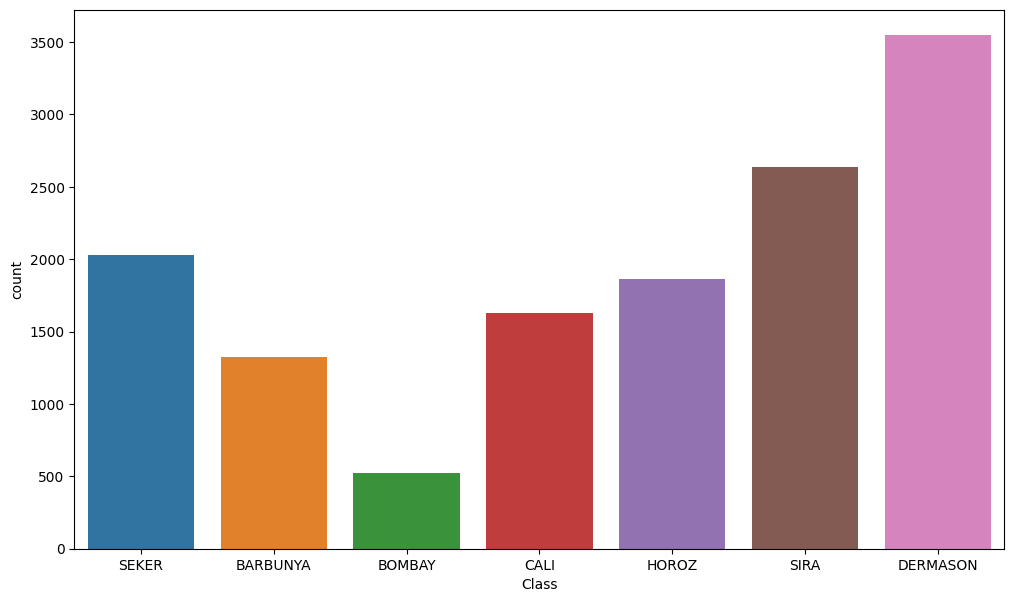

In [ ]:
#Univariate Analysis Menggunakan attribut : Class & Visualisasi Attribut Class menggunakan CountPlot
plt.figure(figsize=(12,7))
sns.countplot(x='Class', data=data)
plt.show()

<Axes: xlabel='Class', ylabel='Count'>

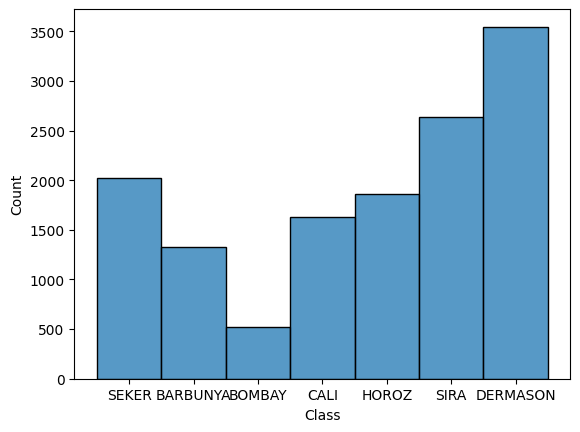

In [ ]:
#Univariate Analysis Menggunakan attribut : Class & Visualisasi Attribut Class menggunakan Histplot
sns.histplot(data.Class)

<Axes: ylabel='Class'>

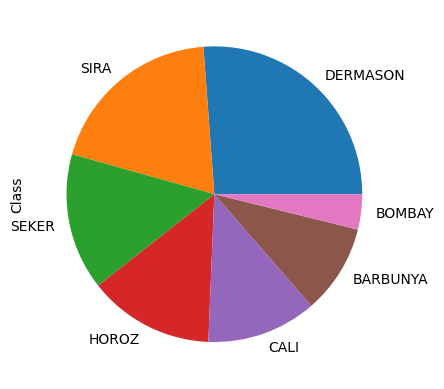

In [ ]:
#Univariate Analysis Menggunakan attribut : Class & Visualisasi Attribut Class menggunakan Pie
data.Class.value_counts().plot(kind='pie')

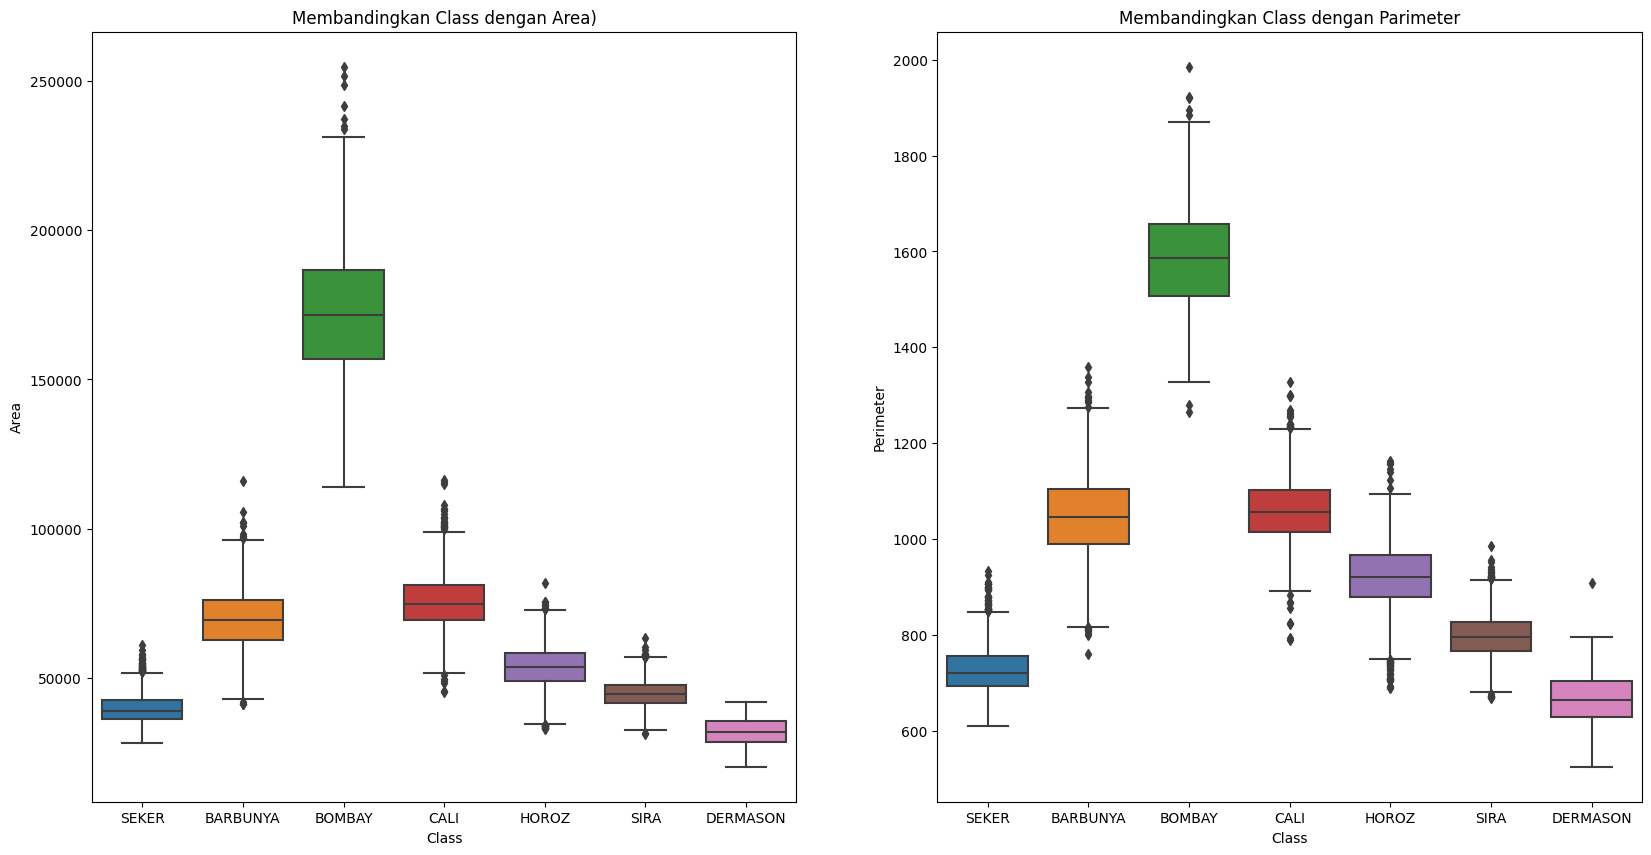

In [ ]:
#bivariate Analysis

#Bagian 1 Class Vs Perimeter
# Membuat figure dan subplot dengan ukuran yang lebih lebar
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title ("Membandingkan Class dengan Area)")
sns.boxplot( x="Class", y='Area', data=data)

#Bagian 2 Class Vs Area
plt.subplot(1,2,2)
plt.title ("Membandingkan Class dengan Parimeter")
sns.boxplot( x="Class", y='Perimeter', data=data)
plt.show()

In [ ]:
#Multivariate Analysis
Korelasi = data.corr()
Korelasi.shape

<ipython-input-131-05cd92c2bbe5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Korelasi = data.corr()


(16, 16)

<ipython-input-132-0563027074b8>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, fmt=".2f", linewidth=.5, cmap="crest")


Text(0.5, 1.0, 'Korelasi Heatmap')

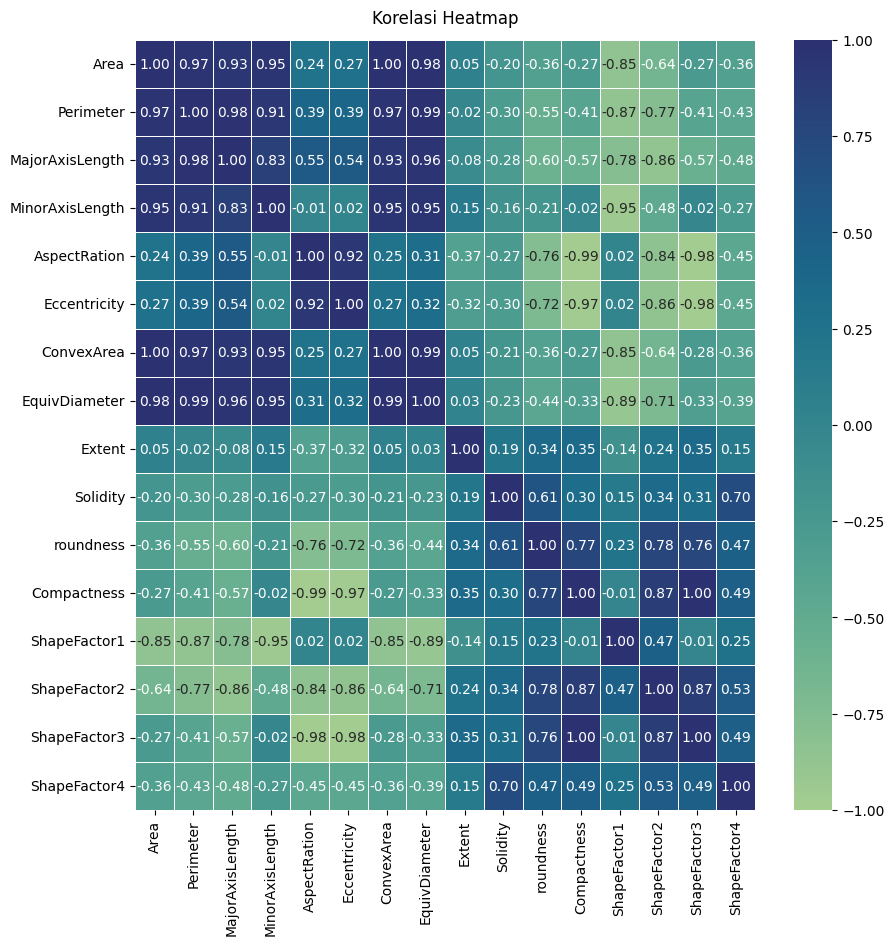

In [ ]:
#Visualisasi Dalam Bentuk Heatmap
plt.figure(figsize=(10,10))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, fmt=".2f", linewidth=.5, cmap="crest")
heatmap.set_title('Korelasi Heatmap', fontdict={'fontsize':12}, pad=12)

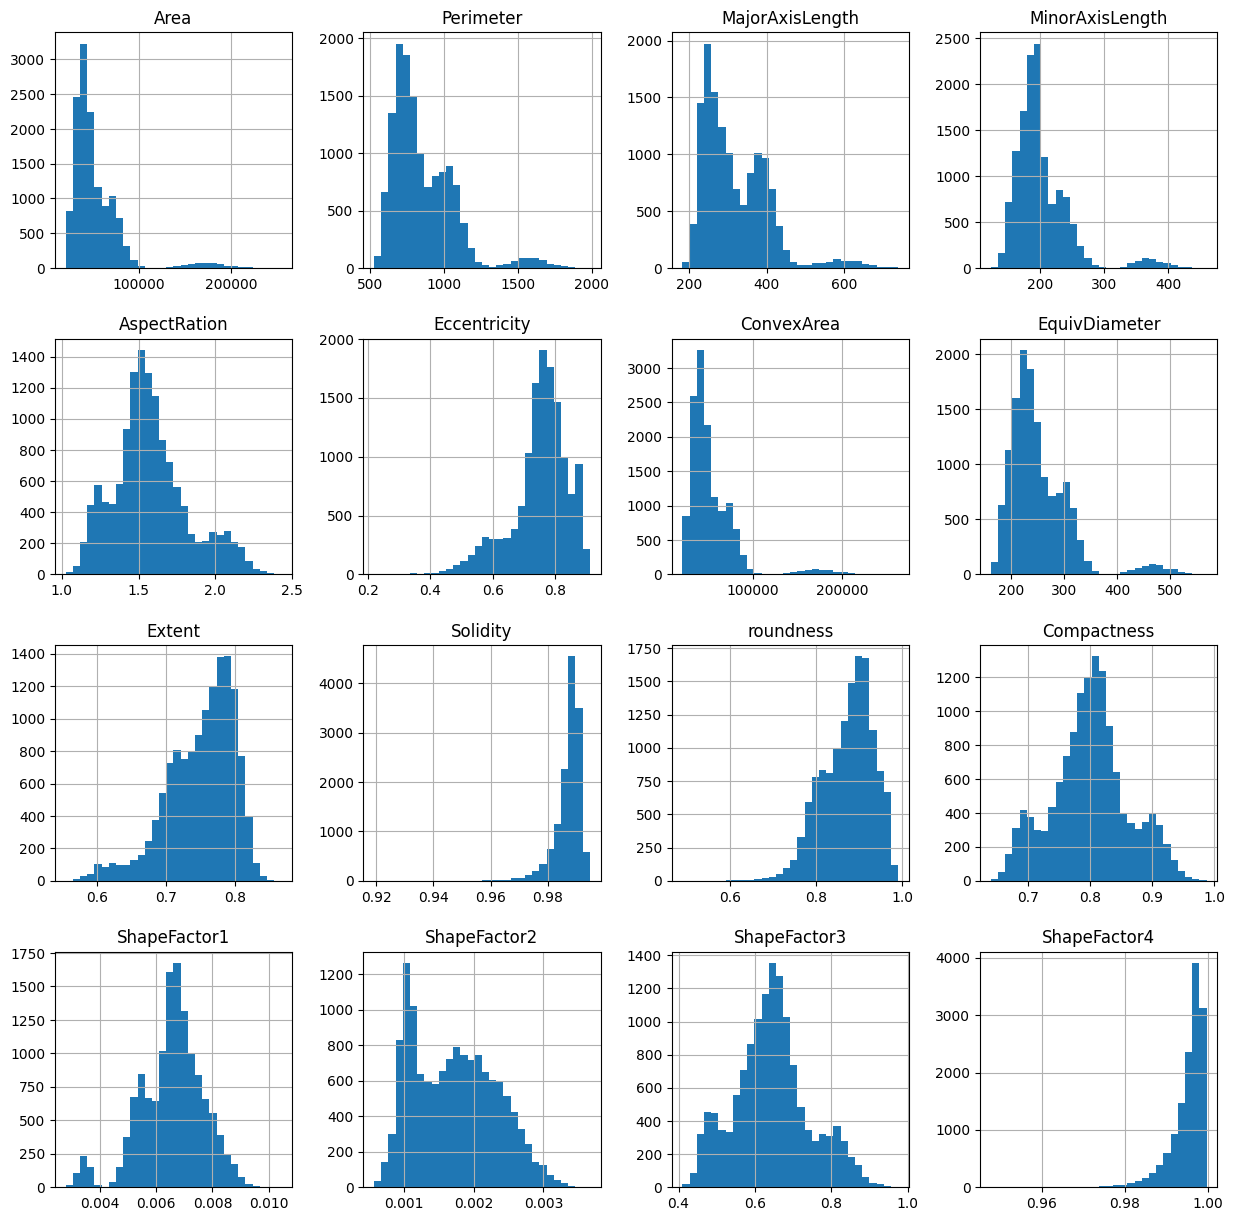

In [ ]:
#Visualisasi Menggunakan Attribute Histogram
data.hist(bins=30, figsize=(15,15))
plt.show()

**4. MODELLING**



Dalam Modelling ini, Saya menggunakan 5 Algoritma
1.   Logistic Regresion
2.   K Nearest Neighbors (KNN)
3. Decision Tree
4. Naive Bayes
5. Support vector machine ( SVM )


---




In [ ]:
#Import Library
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
from sklearn.metrics import precision_score,accuracy_score,recall_score,confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
#Split Data
x= data.iloc[:,:-1].values
y= data.iloc[:, -1].values

In [ ]:
#Splt Data menjadi data training 75% dan data Testing 25%
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)

In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)

**A. ALGORITMA LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(random_state=0)
LR.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [ ]:
y_pred=LR.predict(x_test)

In [ ]:
#Skor Akurasi Algoritma Logistic Regression
LR.score(x_test,y_test)

0.9208505611340815

In [ ]:
#Reporting
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

    BARBUNYA       0.94      0.89      0.91       322
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.94      0.95      0.94       431
    DERMASON       0.92      0.92      0.92       915
       HOROZ       0.96      0.94      0.95       464
       SEKER       0.93      0.95      0.94       474
        SIRA       0.85      0.87      0.86       663

    accuracy                           0.92      3386
   macro avg       0.93      0.93      0.93      3386
weighted avg       0.92      0.92      0.92      3386



In [ ]:
Evaluation=pd.DataFrame(['LR'],columns=['Algorithm'])

**B.  ALGORITMA K Neirest Neighbors ( KNN )**

In [ ]:
#training Model
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
KNN.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
#predicting
y_pred=KNN.predict(x_test)

In [ ]:
#Skor Akurasi Algoritma KNN
KNN.score(x_test,y_test)

0.9205552274069698

In [ ]:
#Report
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

    BARBUNYA       0.95      0.89      0.92       322
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.93      0.96      0.95       431
    DERMASON       0.91      0.92      0.91       915
       HOROZ       0.95      0.95      0.95       464
       SEKER       0.94      0.95      0.94       474
        SIRA       0.86      0.86      0.86       663

    accuracy                           0.92      3386
   macro avg       0.94      0.93      0.93      3386
weighted avg       0.92      0.92      0.92      3386



**3.  ALGORITMA DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT= DecisionTreeClassifier()
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = DT.predict(x_test)

In [ ]:
#Skor Akurasi Algoritma Decision Tree
DT.score(x_test,y_test)

0.8895451860602481

In [ ]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

    BARBUNYA       0.89      0.89      0.89       322
      BOMBAY       1.00      0.99      1.00       117
        CALI       0.94      0.90      0.92       431
    DERMASON       0.90      0.88      0.89       915
       HOROZ       0.91      0.93      0.92       464
       SEKER       0.90      0.93      0.92       474
        SIRA       0.81      0.82      0.81       663

    accuracy                           0.89      3386
   macro avg       0.91      0.91      0.91      3386
weighted avg       0.89      0.89      0.89      3386



**4.  ALGORITMA NAIVE BAYES**

In [ ]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred=NB.predict(x_test)

In [ ]:
#Lihat Skor Akurasi Algoritma Naive Bayes
NB.score(x_test,y_test)

0.8907265209686946

**5. ALGORITMAN SUPPORT VECTOR MACHINE LINEAR ( SVM )**

In [ ]:
from sklearn.svm import SVC
SVM = SVC(kernel = 'linear', random_state = 0)
SVM.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
y_pred=SVM.predict(x_test)

In [ ]:
#Melihat Skor Akurasi Support Vector Machine Linear
SVM.score(x_test,y_test)

0.9223272297696397

In [ ]:
#REPORT
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

    BARBUNYA       0.93      0.90      0.91       322
      BOMBAY       1.00      0.99      1.00       117
        CALI       0.93      0.95      0.94       431
    DERMASON       0.92      0.93      0.93       915
       HOROZ       0.95      0.94      0.94       464
       SEKER       0.93      0.95      0.94       474
        SIRA       0.87      0.86      0.87       663

    accuracy                           0.92      3386
   macro avg       0.93      0.93      0.93      3386
weighted avg       0.92      0.92      0.92      3386



**EVALUATION**

In [ ]:
models = [LR,KNN,DT,NB,SVM]
nilai_akurasi = []

for model in models:
  y_pred=model.predict(x_test)
  akurasi=accuracy_score(y_test,y_pred)
  nilai_akurasi.append(akurasi)

print(nilai_akurasi)

[0.9208505611340815, 0.9205552274069698, 0.8895451860602481, 0.8907265209686946, 0.9223272297696397]


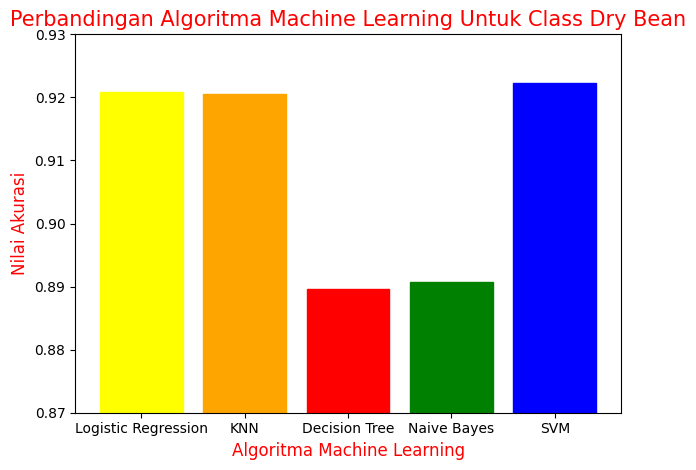

In [ ]:

# Daftar warna untuk setiap bar
colors = ['yellow', 'orange', 'red', 'green', 'blue']

# Membuat diagram batang dengan variasi warna
fig, ax = plt.subplots()
bars = ax.bar(['Logistic Regression', 'KNN', 'Decision Tree', 'Naive Bayes', 'SVM'], nilai_akurasi)

# Mengatur warna untuk setiap bar
for i in range(len(bars)):
    bars[i].set_color(colors[i])

plt.ylim(0.87, 0.93)
plt.title('Perbandingan Algoritma Machine Learning Untuk Class Dry Bean', fontsize=15, color='r')
plt.xlabel("Algoritma Machine Learning", fontsize=12, color="r")
plt.ylabel("Nilai Akurasi", fontsize=12, color="r")
plt.tight_layout()
plt.show()


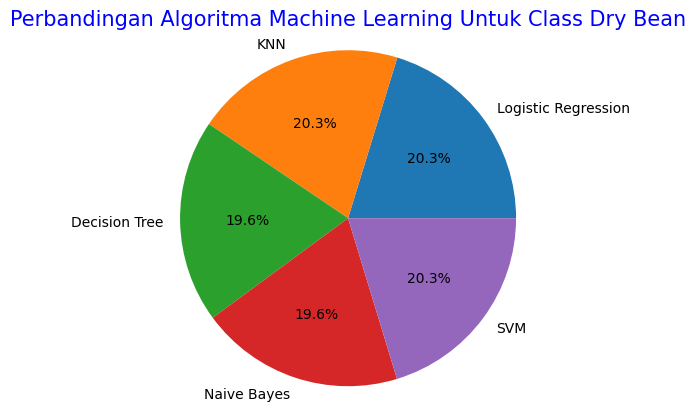

In [ ]:
# Label untuk setiap algoritma
labels = ['Logistic Regression', 'KNN', 'Decision Tree', 'Naive Bayes', 'SVM']

# Membuat diagram pie
plt.pie(nilai_akurasi, labels=labels, autopct='%1.1f%%')
plt.title('Perbandingan Algoritma Machine Learning Untuk Class Dry Bean', fontsize=15, color='b')
plt.axis('equal')  # Memastikan diagram pie memiliki bentuk lingkaran
plt.show()

Jadi dari ke 5 algoritma yang digunakan, terdapat 3 algoritma yang sama sama tinggi yaitu,  Support Vector Machine, Algoritma Logistic regression, dan Algoritma KNN dalam pie chart memiliki persentase yang sama. Namun pada diagram subplot Algoritma SVM ( Support Vector Machine ) Memiliki jumlah yang paling tinggi, Ketiga algoritma tersebut memiliki selisih yang sangatlah tipis yaitu

 Logistic Regression = 0.9208505611340815

KNN = 0.9205552274069698

SVM = 0.9223272297696397


---



**DEPLOYMENT**

LR KNN dan SVM  memberikan akurasi yang sama yaitu 92%

Decision tree, Naive Bayes memberikan akurasi yang sama yaitu 89%

Semua algoritma memberikan akurasi yang hampir serupa.

Kesimpulannya dari ketiga algortima yang akurasinya paling tinggi, akan digunakan algoritma Support Vector Machine (SVM) untuk klasifikasi penentuan kelas kacang kering karena Algoritma SVM lebih tinggi sedikit dibandingkan KNN dan LR

---